In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/cycledata_utf8.csv", delimiter=";", encoding= "utf-8")

In [3]:
df.head(10)


,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Trafikkmengde,...,Ikke gyldig lengde,Lengdekvalitetsgrad (%),"< 5,6m",">= 5,6m","5,6m - 7,6m","7,6m - 12,5m","12,5m - 16,0m",">= 16,0m","16,0m - 24,0m",">= 24,0m"
0,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,1,1,...,1,"0,00",-,-,-,-,-,-,-,-
1,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,2,5,...,5,"0,00",-,-,-,-,-,-,-,-
2,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,Totalt i retning Danmarksplass,5,...,5,"0,00",-,-,-,-,-,-,-,-
3,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,Totalt i retning Florida,1,...,1,"0,00",-,-,-,-,-,-,-,-
4,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,Totalt,6,...,6,"0,00",-,-,-,-,-,-,-,-
5,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,1,0,...,0,"100,00",-,-,-,-,-,-,-,-
6,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,2,0,...,0,"100,00",-,-,-,-,-,-,-,-
7,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,Totalt i retning Danmarksplass,0,...,0,"100,00",-,-,-,-,-,-,-,-
8,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,Totalt i retning Florida,0,...,0,"100,00",-,-,-,-,-,-,-,-
9,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,Totalt,0,...,0,"100,00",-,-,-,-,-,-,-,-


In [4]:
df.columns

Index(['Trafikkregistreringspunkt', 'Navn', 'Vegreferanse', 'Fra', 'Til',
       'Dato', 'Fra tidspunkt', 'Til tidspunkt', 'Felt', 'Trafikkmengde',
       'Dekningsgrad (%)', 'Antall timer total', 'Antall timer inkludert',
       'Antall timer ugyldig', 'Ikke gyldig lengde', 'Lengdekvalitetsgrad (%)',
       '< 5,6m', '>= 5,6m', '5,6m - 7,6m', '7,6m - 12,5m', '12,5m - 16,0m',
       '>= 16,0m', '16,0m - 24,0m', '>= 24,0m'],
      dtype='object')

In [8]:
#Sortere til de viktige colonnene:

viktkigdf = df.loc[:,['Dato','Fra tidspunkt','Felt', 'Trafikkmengde']]

viktkigdf.head

<bound method NDFrame.head of              Dato Fra tidspunkt                            Felt  Trafikkmengde
0      2022-08-31         00:00                               1              1
1      2022-08-31         00:00                               2              5
2      2022-08-31         00:00  Totalt i retning Danmarksplass              5
3      2022-08-31         00:00        Totalt i retning Florida              1
4      2022-08-31         00:00                          Totalt              6
...           ...           ...                             ...            ...
43860  2023-08-31         12:00                               1             36
43861  2023-08-31         12:00                               2             30
43862  2023-08-31         12:00  Totalt i retning Danmarksplass             30
43863  2023-08-31         12:00        Totalt i retning Florida             36
43864  2023-08-31         12:00                          Totalt             66

[43865 rows x 4 colum

In [10]:
#get only totalt rows
dftot = viktkigdf[viktkigdf['Felt'] == 'Totalt']
dftot.head(10)

,Dato,Fra tidspunkt,Felt,Trafikkmengde
4,2022-08-31,00:00,Totalt,6
9,2022-08-31,01:00,Totalt,0
14,2022-08-31,02:00,Totalt,2
19,2022-08-31,03:00,Totalt,0
24,2022-08-31,04:00,Totalt,0
29,2022-08-31,05:00,Totalt,9
34,2022-08-31,06:00,Totalt,67
39,2022-08-31,07:00,Totalt,306
44,2022-08-31,08:00,Totalt,365
49,2022-08-31,09:00,Totalt,153


In [16]:
dfweather = pd.read_csv('data/weather.csv', on_bad_lines = 'warn')
dfweather.head(10)

Skipping line 36628: expected 6 fields, saw 10
Skipping line 36664: expected 6 fields, saw 10



,Dato,Tid,Solskinstid,Lufttemperatur,Relativ luftfuktighet,Vindstyrke
0,2022-08-31,00:00,0.0,13.7,88.0,0.0
1,2022-08-31,00:10,0.0,13.9,87.0,0.0
2,2022-08-31,00:20,0.0,14.1,87.0,0.0
3,2022-08-31,00:30,0.0,14.1,87.0,0.0
4,2022-08-31,00:40,0.0,14.3,86.0,0.0
5,2022-08-31,00:50,0.0,14.3,86.0,0.0
6,2022-08-31,01:00,0.0,14.2,87.0,0.0
7,2022-08-31,01:10,0.0,14.4,87.0,0.0
8,2022-08-31,01:20,0.0,14.4,87.0,0.0
9,2022-08-31,01:30,0.0,14.5,87.0,0.0


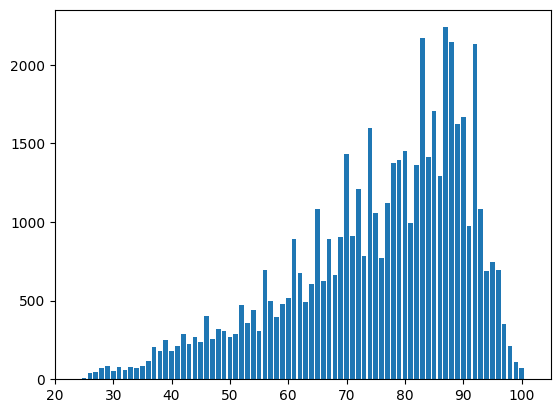

In [40]:


luftfuktighet = dfweather.loc[:,'Relativ luftfuktighet']

count = np.unique(luftfuktighet, return_counts=True)

luftfuktigheter = count[0]
luftfuktighetantall = count[1]

plt.bar(luftfuktigheter, luftfuktighetantall)
plt.xlim((20, 105))
plt.show()



In [46]:



dfweather['relative_luftfuktighet_categorized'] = pd.cut(dfweather['Relativ luftfuktighet'], bins=[0,50,80,101], labels=['0-49','50-79','80-100'])

dfweather.head(10)


,Dato,Tid,Solskinstid,Lufttemperatur,Relativ luftfuktighet,Vindstyrke,relative_luftfuktighet_categorized
0,2022-08-31,00:00,0.0,13.7,88.0,0.0,80-100
1,2022-08-31,00:10,0.0,13.9,87.0,0.0,80-100
2,2022-08-31,00:20,0.0,14.1,87.0,0.0,80-100
3,2022-08-31,00:30,0.0,14.1,87.0,0.0,80-100
4,2022-08-31,00:40,0.0,14.3,86.0,0.0,80-100
5,2022-08-31,00:50,0.0,14.3,86.0,0.0,80-100
6,2022-08-31,01:00,0.0,14.2,87.0,0.0,80-100
7,2022-08-31,01:10,0.0,14.4,87.0,0.0,80-100
8,2022-08-31,01:20,0.0,14.4,87.0,0.0,80-100
9,2022-08-31,01:30,0.0,14.5,87.0,0.0,80-100


[  -8   -7   -6   -5   -4   -3   -2   -1    0    1    2    3    4    5
    6    7    8    9   10   11   12   13   14   15   16   17   18   19
   20   21   22   23   24   25   26   27 9999]


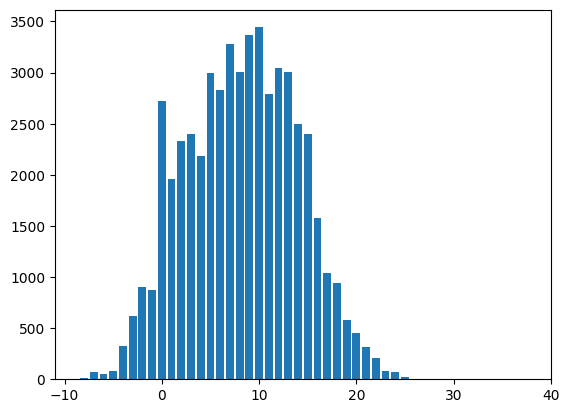

In [54]:

temperatur = np.array(dfweather.loc[:,'Lufttemperatur'])

integertemp = temperatur.astype('int')

temperaturcounts = np.unique(integertemp, return_counts = True)

li1 = temperaturcounts[0]
li2 = temperaturcounts[1]

print(li1)

plt.bar(li1,li2)
plt.xlim(integertemp.min() - 3, 40)
plt.show()
